In [10]:
!pip install ase==3.18.1

  Using cached ase-3.18.1-py3-none-any.whl (2.0 MB)
  Attempting uninstall: ase
    Found existing installation: ase 3.21.0
    Uninstalling ase-3.21.0:
      Successfully uninstalled ase-3.21.0


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from ase.io import read, write
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.structure import Structure
from pymatgen.analysis.structure_analyzer import OxideType, oxide_type

import seaborn as sns
import matplotlib.pyplot as plt
from ase import Atoms
import os
import zipfile
import shutil


In [2]:
os.chdir('E:\MSS\Thesis\level_0_validation')

In [3]:
reaxff_results_1_df = pd.read_excel('autojobs_1_results.xlsx', usecols=['Job name', 'Energy','# atoms', 'Formula'], header=1)
reaxff_results_2_df = pd.read_excel('autojobs_2_results.xlsx', usecols=['Job name', 'Energy','# atoms', 'Formula'], header=1)
reaxff_results_df = pd.concat([reaxff_results_1_df,reaxff_results_2_df], ignore_index=True)
reaxff_results_df['forces'] = 0
reaxff_results_df['Job name'] = reaxff_results_df['Job name'].apply(lambda x:x.replace('single_point.','') )
reaxff_results_df['energy_per_atom'] = reaxff_results_df['Energy']/reaxff_results_df['# atoms']
reaxff_results_df

,Job name,Formula,# atoms,Energy,forces,energy_per_atom
0,3394_Stage_2__step25,Li_7 O_48 V_16,71,-334.134584,0,-4.706121
1,3376_Stage_2_Iter_000001_Stage_2__step87,Li_7 O_20 V_8,35,-161.383513,0,-4.610958
2,3376_Stage_2_Iter_000001_Stage_2__step86,Li_7 O_20 V_8,35,-161.387405,0,-4.611069
3,3376_Stage_2_Iter_000001_Stage_2__step85,Li_7 O_20 V_8,35,-161.391457,0,-4.611184
4,3376_Stage_2_Iter_000001_Stage_2__step84,Li_7 O_20 V_8,35,-161.392418,0,-4.611212
...,...,...,...,...,...,...
1654,3218_Stage_2_Iter_000001_Stage_4__step62,Li_8 O_20 V_8,36,-150.663986,0,-4.185111
1655,3218_Stage_2_Iter_000001_Stage_4__step60,Li_8 O_20 V_8,36,-150.610277,0,-4.183619
1656,3218_Stage_2_Iter_000001_Stage_4__step61,Li_8 O_20 V_8,36,-150.639588,0,-4.184433
1657,3218_Stage_2_Iter_000001_Stage_4__step59,Li_8 O_20 V_8,36,-150.589216,0,-4.183034


In [4]:
forces_1_df = pd.read_csv('autojobs_1_report.tsv', sep='\t', header=None)
forces_2_df = pd.read_csv('autojobs_2_report.tsv', sep='\t', header=None)
forces_df = pd.concat([forces_1_df, forces_2_df], ignore_index=True)
# Separate the data into coordinates and file paths
forces = []
file_paths = []
temp_forces=[]
for i in range(len(forces_df)):
    if ('/ams.rkf' in forces_df[0].iloc[i] ):
        forces.append(temp_forces)
        temp_forces =[]
        file_paths.append(forces_df[0].iloc[i])
    else:
        temp_forces.append(forces_df[0].iloc[i])

In [5]:
for i in range(len(file_paths)):
    matching_index = -1
    structure_name = file_paths[i].split('single_point.')[1].split('.results')[0]

    #finding the matching index
    matching_index = reaxff_results_df[reaxff_results_df['Job name'] == structure_name].index[0]
    if (matching_index != -1):

      # forces are strings in forces list. converting and making them negative and bringing Hatree/Bohr to ev/atom
      reaxff_results_df['forces'].iloc[matching_index] =[[-51.42208619083232*float(val) for val in point.split()] for point in forces[i]]  # verifiedd

    else:
      print('Warning!! found no match for ', file_paths[i])



C:\Users\NAMIREDDYVIKASREDDY\AppData\Local\Temp\ipykernel_15116\2763085023.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reaxff_results_df['forces'].iloc[matching_index] =[[-51.42208619083232*float(val) for val in point.split()] for point in forces[i]]  # verifiedd


In [6]:
reaxff_results_df

,Job name,Formula,# atoms,Energy,forces,energy_per_atom
0,3394_Stage_2__step25,Li_7 O_48 V_16,71,-334.134584,"[[1.1142070787117497, -1.1281604617996321, -0....",-4.706121
1,3376_Stage_2_Iter_000001_Stage_2__step87,Li_7 O_20 V_8,35,-161.383513,"[[-1.7352784077368655, -5.017599534500435, 3.5...",-4.610958
2,3376_Stage_2_Iter_000001_Stage_2__step86,Li_7 O_20 V_8,35,-161.387405,"[[-1.7407121795846505, -5.019504208572943, 3.5...",-4.611069
3,3376_Stage_2_Iter_000001_Stage_2__step85,Li_7 O_20 V_8,35,-161.391457,"[[-1.750795022244949, -5.023955304353622, 3.51...",-4.611184
4,3376_Stage_2_Iter_000001_Stage_2__step84,Li_7 O_20 V_8,35,-161.392418,"[[-1.7515103034638635, -5.024767259094576, 3.5...",-4.611212
...,...,...,...,...,...,...
1654,3218_Stage_2_Iter_000001_Stage_4__step62,Li_8 O_20 V_8,36,-150.663986,"[[-0.39817561155974807, -7.575422547620684, -0...",-4.185111
1655,3218_Stage_2_Iter_000001_Stage_4__step60,Li_8 O_20 V_8,36,-150.610277,"[[-0.40500395038502873, -7.568223969774829, -0...",-4.183619
1656,3218_Stage_2_Iter_000001_Stage_4__step61,Li_8 O_20 V_8,36,-150.639588,"[[-0.40132624278066037, -7.571039843214638, -0...",-4.184433
1657,3218_Stage_2_Iter_000001_Stage_4__step59,Li_8 O_20 V_8,36,-150.589216,"[[-0.4105755334238054, -7.581240442452314, -0....",-4.183034


In [7]:
# computing formation energies and adding formation energy column

# Got the below energies from reaxff running on elemets in level_1_validation
reaxff_eng_li = -14.61893493/9
reaxff_eng_v = -10.94017062/2
reaxff_eng_o = -19.72201319/8
reaxff_results_df['formation_energy_per_atom'] = 0

for i in range(len(reaxff_results_df)):
    no_of_li, no_of_v, no_of_o = 0,0,0
    formula = reaxff_results_df['Formula'].iloc[i]
    formula_vec=formula.split(' ')
    for species in formula_vec:
        element=species.split('_')[0]
        number = species.split('_')[1]
        if (element=='Li'):
           no_of_li =int(number)
        if(element=='V'):
           no_of_v =int(number)
        if(element=='O'):
            no_of_o =int(number)

    # compute the formation energies
    reaxff_results_df['formation_energy_per_atom'].iloc[i]= (reaxff_results_df['Energy'].iloc[i]-(no_of_li*reaxff_eng_li
                                                                                   + no_of_v*reaxff_eng_v
                                                                                    +no_of_o*reaxff_eng_o))/(no_of_li+no_of_v+no_of_o)
    # checking number of atoms
    if (reaxff_results_df['# atoms'].iloc[i] == (no_of_li+no_of_v+no_of_o)):
      pass
    else:
      print('problem in iter ', i ,reaxff_results_df['# atoms'].iloc[i], (no_of_li+no_of_v+no_of_o) )
reaxff_results_df

C:\Users\NAMIREDDYVIKASREDDY\AppData\Local\Temp\ipykernel_15116\3792599413.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reaxff_results_df['formation_energy_per_atom'].iloc[i]= (reaxff_results_df['Energy'].iloc[i]-(no_of_li*reaxff_eng_li


,Job name,Formula,# atoms,Energy,forces,energy_per_atom,formation_energy_per_atom
0,3394_Stage_2__step25,Li_7 O_48 V_16,71,-334.134584,"[[1.1142070787117497, -1.1281604617996321, -0....",-4.706121,-1.646632
1,3376_Stage_2_Iter_000001_Stage_2__step87,Li_7 O_20 V_8,35,-161.383513,"[[-1.7352784077368655, -5.017599534500435, 3.5...",-4.610958,-1.627072
2,3376_Stage_2_Iter_000001_Stage_2__step86,Li_7 O_20 V_8,35,-161.387405,"[[-1.7407121795846505, -5.019504208572943, 3.5...",-4.611069,-1.627183
3,3376_Stage_2_Iter_000001_Stage_2__step85,Li_7 O_20 V_8,35,-161.391457,"[[-1.750795022244949, -5.023955304353622, 3.51...",-4.611184,-1.627299
4,3376_Stage_2_Iter_000001_Stage_2__step84,Li_7 O_20 V_8,35,-161.392418,"[[-1.7515103034638635, -5.024767259094576, 3.5...",-4.611212,-1.627326
...,...,...,...,...,...,...,...
1654,3218_Stage_2_Iter_000001_Stage_4__step62,Li_8 O_20 V_8,36,-150.663986,"[[-0.39817561155974807, -7.575422547620684, -0...",-4.185111,-1.238991
1655,3218_Stage_2_Iter_000001_Stage_4__step60,Li_8 O_20 V_8,36,-150.610277,"[[-0.40500395038502873, -7.568223969774829, -0...",-4.183619,-1.237499
1656,3218_Stage_2_Iter_000001_Stage_4__step61,Li_8 O_20 V_8,36,-150.639588,"[[-0.40132624278066037, -7.571039843214638, -0...",-4.184433,-1.238313
1657,3218_Stage_2_Iter_000001_Stage_4__step59,Li_8 O_20 V_8,36,-150.589216,"[[-0.4105755334238054, -7.581240442452314, -0....",-4.183034,-1.236914


In [8]:
ace_results_df = pd.read_pickle('ace_validation_0_7.2.pkl.gz')
ace_results_df['name']= ace_results_df['name'].apply(lambda x:x.replace('.cif','') )
ace_results_df.iloc[0:3]

,name,ase_atoms,energy,forces,gamma
0,3376_Stage_2_Iter_000003_Stage_2__step24,"(Atom('Li', [1.2038073288, 1.6041610816, 2.374...",-232.005876,"[[0.9013044124518671, 0.24341892996347955, 0.2...","[0.6020169938896771, 0.5741433374179756, 0.819..."
1,3297_Stage_2_Iter_000001_Stage_2__step147,"(Atom('Li', [-0.09811118779177126, 5.674324656...",-540.081486,"[[-0.05863477039105899, 0.105288309776199, -0....","[0.8379636755026425, 0.4269491273523567, 0.446..."
2,3297_Stage_2_Iter_000001_Stage_2__step216,"(Atom('Li', [-0.10768552528658566, 5.661097792...",-540.00402,"[[-0.09585607754404557, 0.12312995955837451, -...","[0.806060838033348, 0.5001595072004967, 0.4512..."


In [9]:
dft_ace_results_df = pd.read_pickle('dft_pristine_validation_0.pkl.gz')
# dft_results_df['name'] = dft_results_df['name'].apply(lambda x:x.split('/low_energy_small_structures/')[1].replace('/','_').replace('.cif', '').replace('_data.json','') )


dft_ace_results_df['NUMBER_OF_ATOMS']=0
dft_ace_results_df['dft_energy'] = dft_ace_results_df['ase_atoms'].apply(lambda x:x.get_potential_energy(force_consistent=True))
dft_ace_results_df['dft_energy_per_atom'] = 0
dft_ace_results_df['dft_forces'] = dft_ace_results_df['ase_atoms'].apply(lambda x:x.get_forces())
dft_ace_results_df['oxide_type']= np.nan
dft_ace_results_df['anionic_correction'] = 0
dft_ace_results_df['GGA_correction'] = 0
dft_ace_results_df['dft_energy_corrected']= 0
dft_ace_results_df['dft_energy_corrected_per_atom'] = 0
dft_ace_results_df['dft_energy_formation_per_atom'] = 0

dft_ace_results_df['ace_energy'] = 0
dft_ace_results_df['ace_energy_per_atom'] = 0
dft_ace_results_df['ace_energy_corrected']= 0
dft_ace_results_df['ace_energy_corrected_per_atom'] = 0
dft_ace_results_df['ace_energy_formation_per_atom'] = 0
dft_ace_results_df['gamma'] = 0
# dft_ace_results_df['ace_forces'] = [0 for i in range(len(dft_ace_results_df))]
dft_ace_results_df.iloc[0:3]


,name,ase_atoms,NUMBER_OF_ATOMS,dft_energy,dft_energy_per_atom,dft_forces,oxide_type,anionic_correction,GGA_correction,dft_energy_corrected,dft_energy_corrected_per_atom,dft_energy_formation_per_atom,ace_energy,ace_energy_per_atom,ace_energy_corrected,ace_energy_corrected_per_atom,ace_energy_formation_per_atom,gamma
0,3014_Stage_2_Iter_000001_Stage_3__step1,"(Atom('Li', [0.0, 3.61384, 3.61384], index=0),...",0,-19.137299,0,"[[0.0, 0.0, -0.0], [1e-06, 0.0, 2e-06], [-0.0,...",NaN,0,0,0,0,0,0,0,0,0,0,0
1,3014_Stage_2_Iter_000001_Stage_3__step2,"(Atom('Li', [0.0, 3.62394, 3.62394], index=0),...",0,-19.138994,0,"[[0.0, 0.0, -0.0], [0.0, -0.0, -0.0], [-0.0, -...",NaN,0,0,0,0,0,0,0,0,0,0,0
2,3014_Stage_2_Iter_000001_Stage_3__step3,"(Atom('Li', [0.0, 3.6305, 3.6305], index=0), A...",0,-19.139313,0,"[[0.0, 0.0, -0.0], [-1e-06, -0.0, -1e-06], [-0...",NaN,0,0,0,0,0,0,0,0,0,0,0


In [14]:
ace_forces = []
ace_gamma = []

for i in range(len(dft_ace_results_df)):

  #finding the matching index
  matching_index =-1
  matching_index = ace_results_df[ace_results_df['name']== dft_ace_results_df['name'].iloc[i]].index[0]

  # check if a match is found
  if (matching_index != -1):

    # collecting the energies
    dft_ace_results_df['ace_energy'].iloc[i] = ace_results_df['energy'].iloc[matching_index]
    ace_forces.append( ace_results_df['forces'].iloc[matching_index])
    ace_gamma.append(ace_results_df['gamma'].iloc[matching_index])


  else:
      print(f'found no matching entry from reaxff_results for entry {i} in dft_results' )

dft_ace_results_df['ace_forces'] = ace_forces
dft_ace_results_df['gamma'] = ace_gamma

C:\Users\NAMIREDDYVIKASREDDY\AppData\Local\Temp\ipykernel_15116\4116077968.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_ace_results_df['ace_energy'].iloc[i] = ace_results_df['energy'].iloc[matching_index]


In [15]:
# adding anionic corrections to DFT energies

# iterate through each structure
for i in range(len(dft_ace_results_df)):
  atoms = dft_ace_results_df['ase_atoms'].iloc[i]
  # check the oxide type

  structure = AseAtomsAdaptor.get_structure(atoms)
  oxide_typ = oxide_type(structure, return_nbonds=False)

   # add the oxide and GGA correction to the correction field

  if oxide_typ == 'oxide':
    correction = -0.687
  elif oxide_typ == 'peroxide':
    correction = -0.465
  elif oxide_typ == 'superoxide':
    correction = -0.161
  else:

    correction = 0

  num_o_atoms = sum(1 for atom in atoms if atom.symbol == 'O')
  num_v_atoms = sum(1 for atom in atoms if atom.symbol == 'V')
  num_li_atoms = sum(1 for atom in atoms if atom.symbol == 'Li')

  dft_ace_results_df['oxide_type'].iloc[i] = str(oxide_typ)
  dft_ace_results_df['NUMBER_OF_ATOMS'].iloc[i] = sum(1 for atom in atoms )
  dft_ace_results_df['anionic_correction'].iloc[i] = num_o_atoms * correction
  if (num_o_atoms != 0 ):
    dft_ace_results_df['GGA_correction'].iloc[i] = num_v_atoms * (-1.7)
  else:
    pass



# add this energy to the energy colum
dft_ace_results_df['dft_energy_corrected'] = dft_ace_results_df['dft_energy'] + dft_ace_results_df['anionic_correction'] + dft_ace_results_df['GGA_correction']
# revaluate energy per atom
dft_ace_results_df['dft_energy_corrected_per_atom'] = dft_ace_results_df['dft_energy_corrected']/dft_ace_results_df['NUMBER_OF_ATOMS']
dft_ace_results_df['dft_energy_per_atom'] = dft_ace_results_df['dft_energy']/dft_ace_results_df['NUMBER_OF_ATOMS']

# add this energy to the energy colum
dft_ace_results_df['ace_energy_corrected'] = dft_ace_results_df['ace_energy'] + dft_ace_results_df['anionic_correction'] + dft_ace_results_df['GGA_correction']
# revaluate energy per atom
dft_ace_results_df['ace_energy_corrected_per_atom'] = dft_ace_results_df['ace_energy_corrected']/dft_ace_results_df['NUMBER_OF_ATOMS']
dft_ace_results_df['ace_energy_per_atom'] = dft_ace_results_df['ace_energy']/dft_ace_results_df['NUMBER_OF_ATOMS']


C:\Users\NAMIREDDYVIKASREDDY\AppData\Local\Temp\ipykernel_15116\2987357340.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_ace_results_df['oxide_type'].iloc[i] = str(oxide_typ)
C:\Users\NAMIREDDYVIKASREDDY\AppData\Local\Temp\ipykernel_15116\2987357340.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_ace_results_df['NUMBER_OF_ATOMS'].iloc[i] = sum(1 for atom in atoms )
C:\Users\NAMIREDDYVIKASREDDY\AppData\Local\Temp\ipykernel_15116\2987357340.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [16]:
# computing formation energies
# Got the below energies from the DFT calculations in Li-V-O calculations.xlsx
dft_eng_li = -17.165273/9
dft_eng_v = - 17.984747/2
dft_eng_o = -39.490002/8

ace_eng_li = -17.14456327978737/9
ace_eng_v = -17.858880034638034/2
ace_eng_o = -40.02361849689383/8

for i in range(len(dft_ace_results_df)):
  atoms = dft_ace_results_df['ase_atoms'].iloc[i]
  num_o_atoms = sum(1 for atom in atoms if atom.symbol == 'O')
  num_v_atoms = sum(1 for atom in atoms if atom.symbol == 'V')
  num_li_atoms = sum(1 for atom in atoms if atom.symbol == 'Li')

  dft_ace_results_df['dft_energy_formation_per_atom'].iloc[i]= (dft_ace_results_df['dft_energy_corrected'].iloc[i] - (num_li_atoms*dft_eng_li
                                                                                   + num_v_atoms*dft_eng_v
                                                                                    +num_o_atoms*dft_eng_o))/dft_ace_results_df['NUMBER_OF_ATOMS'].iloc[i]
  dft_ace_results_df['ace_energy_formation_per_atom'].iloc[i]= (dft_ace_results_df['ace_energy_corrected'].iloc[i] - (num_li_atoms*ace_eng_li
                                                                                   + num_v_atoms*ace_eng_v
                                                                                    +num_o_atoms*ace_eng_o))/dft_ace_results_df['NUMBER_OF_ATOMS'].iloc[i]




C:\Users\NAMIREDDYVIKASREDDY\AppData\Local\Temp\ipykernel_15116\2357173135.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_ace_results_df['dft_energy_formation_per_atom'].iloc[i]= (dft_ace_results_df['dft_energy_corrected'].iloc[i] - (num_li_atoms*dft_eng_li
C:\Users\NAMIREDDYVIKASREDDY\AppData\Local\Temp\ipykernel_15116\2357173135.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_ace_results_df['ace_energy_formation_per_atom'].iloc[i]= (dft_ace_results_df['ace_energy_corrected'].iloc[i] - (num_li_atoms*ace_eng_li


In [17]:
dft_eng_list = []
dft_force_list = []
dft_formation_energy_list = []
ace_eng_list = []
ace_force_list = []
ace_gamma_list =[]
ace_formation_energy_list = []
reaxff_eng_list =[]
reaxff_force_list = []
reaxff_formation_energy_list = []
matching_indices = []


for i in range(len(dft_ace_results_df)):

    #finding the matching index
    matching_index =-1
    matching_index = reaxff_results_df[reaxff_results_df['Job name']== dft_ace_results_df['name'].iloc[i]].index[0]

    # check if a match is found
    if (matching_index != -1):
      matching_indices.append(matching_index)

      # collecting the energies

      dft_eng_list.append(dft_ace_results_df['dft_energy_per_atom'].iloc[i])
      dft_formation_energy_list.append(dft_ace_results_df['dft_energy_formation_per_atom'].iloc[i])
      ace_eng_list.append(dft_ace_results_df['ace_energy_per_atom'].iloc[i])
      ace_formation_energy_list.append(dft_ace_results_df['ace_energy_formation_per_atom'].iloc[i])
      reaxff_eng_list.append(reaxff_results_df['energy_per_atom'].iloc[matching_index])
      reaxff_formation_energy_list.append(reaxff_results_df['formation_energy_per_atom'].iloc[matching_index])

      #  collecting forces
      dft_force_list.append(dft_ace_results_df['dft_forces'].iloc[i])
      ace_force_list.append(dft_ace_results_df['ace_forces'].iloc[i])
      ace_gamma_list.append(dft_ace_results_df['gamma'].iloc[i])
      reaxff_force_list.append(np.array(reaxff_results_df['forces'].iloc[matching_index]))

    else:
       print(f'found no matching entry from reaxff_results for entry {i} in dft_results' )

# creating a dataframe with file names, energies and forces from dft and reaxff
summary_df = pd.DataFrame({'struc_name':dft_ace_results_df['name']})

summary_df['dft_energy(ev/atm)'] =dft_eng_list
summary_df['reaxff_energy(ev/atm)'] =reaxff_eng_list
summary_df['ace_energy(ev/atm)'] = ace_eng_list
summary_df['dft_formation_energy(ev/atm)']= dft_formation_energy_list
summary_df['reaxff_formation_energy(ev/atm)'] =reaxff_formation_energy_list
summary_df['ace_formation_energy(ev/atm)']= ace_formation_energy_list
summary_df['dft_force(ev/ang)']=  dft_force_list
summary_df['reaxff_force(ev/ang)'] = reaxff_force_list
summary_df['ace_force(ev/ang)']=  ace_force_list
summary_df['ace_gamma'] = ace_gamma_list

summary_df[0:2]

,struc_name,dft_energy(ev/atm),reaxff_energy(ev/atm),ace_energy(ev/atm),dft_formation_energy(ev/atm),reaxff_formation_energy(ev/atm),ace_formation_energy(ev/atm),dft_force(ev/ang),reaxff_force(ev/ang),ace_force(ev/ang),ace_gamma
0,3014_Stage_2_Iter_000001_Stage_3__step1,-3.827460,-3.796615,-4.132807,-0.515009,-1.667733,-0.781255,"[[0.0, 0.0, -0.0], [1e-06, 0.0, 2e-06], [-0.0,...","[[-0.0, -0.0, -0.0], [-0.0, 0.0, 0.0], [0.0, -...","[[7.814929259275516e-16, 8.014422459012849e-16...","[2.339663572599761, 3.370222782406003, 2.03681..."
1,3014_Stage_2_Iter_000001_Stage_3__step2,-3.827799,-3.786795,-4.141626,-0.515348,-1.657914,-0.790074,"[[0.0, 0.0, -0.0], [0.0, -0.0, -0.0], [-0.0, -...","[[-0.0, 0.0, -0.0], [-0.0, -0.0, 0.0], [-0.0, ...","[[2.1111584702637742e-15, 2.5413698923060224e-...","[2.3518347056697166, 3.3255581208244536, 1.993..."


In [18]:


# Energy - Compute MAE and RMSE
def energy_metrics(true, computed ):

  mae = mean_absolute_error(np.array(true).flatten(), np.array(computed).flatten())
  rmse = mean_squared_error(np.array(true).flatten(), np.array(computed).flatten(),squared=False)
  return mae, rmse

# Forces - Compute MAE and RMSE

def force_metrics( true, computed):

  true_force_list = np.concatenate(true)
  computed_force_list = np.concatenate(computed)

  mae = mean_absolute_error(true_force_list, computed_force_list)
  rmse = mean_squared_error(true_force_list, computed_force_list, squared=False)
  return mae, rmse

In [19]:
reaxff_energy_mae, reaxff_energy_rmse = energy_metrics(dft_eng_list, reaxff_eng_list)
reaxff_form_energy_mae, reaxff_form_energy_rmse = energy_metrics(dft_formation_energy_list, reaxff_formation_energy_list)
reaxff_force_mae, reaxff_force_rmse = force_metrics(dft_force_list, reaxff_force_list)

print(f"ReaxFF Energy MAE: {reaxff_energy_mae:.4f}")
print(f"ReaxFF Energy RMSE: {reaxff_energy_rmse:.4f}")
print(f"ReaxFF Formation Energy MAE: {reaxff_form_energy_mae:.4f}")
print(f"ReaxFF Formation Energy RMSE: {reaxff_form_energy_rmse:.4f}")
print(f"ReaxFF Force MAE: {reaxff_force_mae:.4f}")
print(f"ReaxFF Force RMSE: {reaxff_force_rmse:.4f}")


ReaxFF Energy MAE: 2.3462
ReaxFF Energy RMSE: 2.5062
ReaxFF Formation Energy MAE: 0.8754
ReaxFF Formation Energy RMSE: 0.9793
ReaxFF Force MAE: 2.0415
ReaxFF Force RMSE: 2.9725


In [20]:
ace_energy_mae, ace_energy_rmse = energy_metrics(dft_eng_list, ace_eng_list)
ace_form_energy_mae, ace_form_energy_rmse = energy_metrics(dft_formation_energy_list, ace_formation_energy_list)
ace_force_mae, ace_force_rmse = force_metrics(dft_force_list, ace_force_list)

print(f"ACE Energy MAE: {ace_energy_mae:.4f}")
print(f"ACE Energy RMSE: {ace_energy_rmse:.4f}")
print(f"ACE Formation Energy MAE: {ace_form_energy_mae:.4f}")
print(f"ACE Formation Energy RMSE: {ace_form_energy_rmse:.4f}")
print(f"ACE Force MAE: {ace_force_mae:.4f}")
print(f"ACE Force RMSE: {ace_force_rmse:.4f}")


ACE Energy MAE: 0.2586
ACE Energy RMSE: 0.5599
ACE Formation Energy MAE: 0.2581
ACE Formation Energy RMSE: 0.5600
ACE Force MAE: 0.2777
ACE Force RMSE: 0.7519


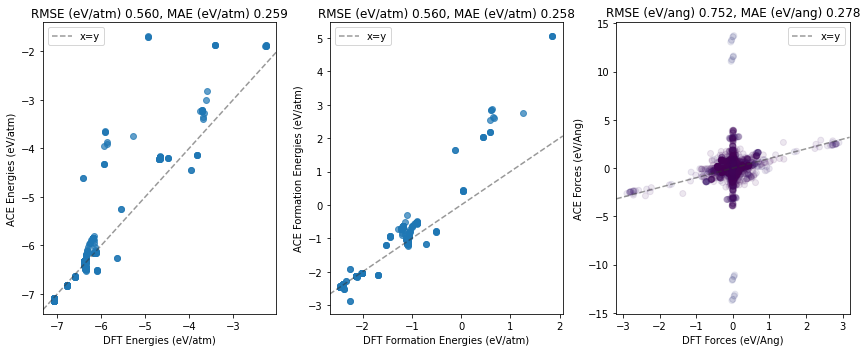

In [28]:
# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

# Scatter plot for energies
axes[0].scatter(summary_df['dft_energy(ev/atm)'], summary_df['ace_energy(ev/atm)'], alpha=0.7)

# Set labels and title for the first subplot
axes[0].set_xlabel('DFT Energies (eV/atm)')
axes[0].set_ylabel('ACE Energies (eV/atm)')
axes[0].set_title(f'RMSE (eV/atm) {ace_energy_rmse:.3f}, MAE (eV/atm) {ace_energy_mae:.3f}')

# Scatter plot for formation energies
axes[1].scatter(summary_df['dft_formation_energy(ev/atm)'], summary_df['ace_formation_energy(ev/atm)'], alpha=0.7)

# Set labels and title for the second subplot
axes[1].set_xlabel('DFT Formation Energies (eV/atm)')
axes[1].set_ylabel('ACE Formation Energies (eV/atm)')
axes[1].set_title(f'RMSE (eV/atm) {ace_form_energy_rmse:.3f}, MAE (eV/atm) {ace_form_energy_mae:.3f}')


axes[2].scatter(np.vstack(summary_df['dft_force(ev/ang)']).flatten(), np.vstack(summary_df['ace_force(ev/ang)']).flatten(), c=colors, alpha=0.1)
axes[2].set_xlabel('DFT Forces (eV/Ang)')
axes[2].set_ylabel('ACE Forces (eV/Ang)')
axes[2].set_title(f'RMSE (eV/ang) {ace_force_rmse:.3f}, MAE (eV/ang) {ace_force_mae:.3f}')


# Set equal limits for both subplots
for ax in axes:

    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())

for ax in axes:
    ax.plot(ax.get_xlim(), ax.get_xlim(), ls="--", c=".2", alpha=0.5,label = ('x=y'))
    ax.legend()



# Adjust layout
plt.tight_layout()


# Save or show the plot
plt.savefig('defects_structures_ace_validation_0.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
colors = []
for structure in ace_gamma_list:
    for gamma in structure:
        colors.append(gamma)
        colors.append(gamma)
        colors.append(gamma)
        

In [26]:
colors

[2.339663572599761,
 2.339663572599761,
 2.339663572599761,
 3.370222782406003,
 3.370222782406003,
 3.370222782406003,
 2.0368187885977136,
 2.0368187885977136,
 2.0368187885977136,
 2.036818788597799,
 2.036818788597799,
 2.036818788597799,
 2.0368187885977704,
 2.0368187885977704,
 2.0368187885977704,
 2.3518347056697166,
 2.3518347056697166,
 2.3518347056697166,
 3.3255581208244536,
 3.3255581208244536,
 3.3255581208244536,
 1.9932989578210822,
 1.9932989578210822,
 1.9932989578210822,
 1.993298957820997,
 1.993298957820997,
 1.993298957820997,
 1.9932989578210822,
 1.9932989578210822,
 1.9932989578210822,
 2.3562883447681315,
 2.3562883447681315,
 2.3562883447681315,
 3.292375215441659,
 3.292375215441659,
 3.292375215441659,
 1.9644942787256525,
 1.9644942787256525,
 1.9644942787256525,
 1.9644942787255388,
 1.9644942787255388,
 1.9644942787255388,
 1.9644942787255673,
 1.9644942787255673,
 1.9644942787255673,
 2.3562883447681315,
 2.3562883447681315,
 2.3562883447681315,
 3.2923